# Nigeria's GDP Growth Rate Prediction

## The Problem Statement

Using the Machine Learning Workflow process and transform data of economic indicators from World Bank, Central Bank of Nigeria and any other reliable sources create a prediction model. This model must predict the GDP growth of Nigeria (1 year ahead) with 70% or greater accuracy.

###### Factors Affecting The Nigerian Economy

Factors that determine the long-run positive economic growth of Nigeria
- Government Expenditure --
- Oil Revenue --
- Non oil revenue --
- Broad Money--
- Foreign Portfolio Investment (FPI) --
- Foreign Exchange Rate --
- Foreign Direct Investment (FDI) --

Factors that determine the long-run negative economic growth on Nigeria
- Real Interest Rate --
- Inflation Rate --
- Economic Freedom --

Steps:
- Get all data containing the above economic indicators from World Bank and IMF
- Clean and prepare all the data as required

Data Sources:  
GDP (current $): https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
  
GDP growth (annual %): https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=csv
  
Broad Money (LCU): https://data.worldbank.org/indicator/FM.LBL.BMNY.CN?locations=NG&view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/FM.LBL.BMNY.CN?downloadformat=csv  
  
FDI net (BoP, $): https://data.worldbank.org/indicator/BN.KLT.DINV.CD?view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/BN.KLT.DINV.CD?downloadformat=csv  
  
Real Interest Rate (%): https://data.worldbank.org/indicator/FR.INR.RINR?locations=NG&view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/FR.INR.RINR?downloadformat=csv  
  
Inflation Rate (%): https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/FP.CPI.TOTL.ZG?downloadformat=csv  
  
Economic Freedom Index - efi: https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=1970&max-year=2015&filter=1&date-type=range  
Direct Link: https://www.fraserinstitute.org/api/economic-data?start_year=1970&end_year=2015&sub=true&indicator[]=area_1&indicator[]=area_2&indicator[]=area_3&indicator[]=area_4&indicator[]=area_5  
  
Portfolio Investment (BoP, $): https://data.worldbank.org/indicator/BN.KLT.PTXL.CD?locations=NG&view=chart  
Direct Link: http://api.worldbank.org/v2/en/indicator/BN.KLT.PTXL.CD?downloadformat=csv  
  
Summary of federal government finances: https://cbn.gov.ng  
Direct Link:https://www.cbn.gov.ng/out/2017/sd/ecopy%20of%202016%20statistical%20bulletin_public%20finance%20statistics_final.xlsx  
  
Exchange Rate (LCU per $): https://data.worldbank.org/indicator/PA.NUS.FCRF  
Direct Link: http://api.worldbank.org/v2/en/indicator/PA.NUS.FCRF?downloadformat=csv  

Importing some basic libraries
- Pandas: For data frames
- NumPy: For numerical analysis
- Matplotlib.pyplot for plotting graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###### -

## Setting All The Required Variables

In [2]:
path = '.\data\\'
index = 'Country Name'
country = 'United Kingdom'
no_of_years_ahead_to_predict = 1


years_to_remove_at_the_end = []

###### -

## Reading Data sets into Pandas Data frames

In [3]:


gdp_df = pd.read_csv(path + 'gdp.csv', skiprows=4, index_col=index)  #Reads the whole gdp.csv file into a pandas data frame
gdp_growth_df = pd.read_csv(path + 'gdp_growth.csv', index_col=index, parse_dates=True) #Reads the whole gdp_growth.csv file into a pandas data frame
broad_money_df = pd.read_csv(path + 'broad_money.csv', skiprows=4, index_col=index)
fdi_df = pd.read_csv(path + 'fdi.csv', index_col=index)
real_int_rate_df = pd.read_csv(path + 'real_interest_rate.csv', skiprows=4, index_col=index)
inflation_df = pd.read_csv(path + 'inflation.csv', skiprows=4, index_col=index)
#efi_df = pd.read_csv(path + 'efi.csv', skiprows=4, usecols=[1,3,4], index_col='Countries') 
fpi_df = pd.read_csv(path + 'fpi.csv', skiprows=4, index_col=index)
ng_finance_df = pd.read_csv(path + 'nigerian_govt_finance_summary.csv', skiprows=1, index_col='Sources ')
exchange_rate_df = pd.read_csv( path + 'exchange_rate.csv', skiprows=4, index_col=index)


#Fetching the needed data from the entire document

ng_revenue_df = ng_finance_df.iloc[[0]]
#ng_oil_rev_df = ng_finance_df.iloc[[1]]
#ng_non_oil_rev_df = ng_finance_df.iloc[[2]]


ng_expenses_df = ng_finance_df.iloc[[5]]
#ng_recex_df = ng_finance_df.iloc[[6]]
#ng_capex_df = ng_finance_df.iloc[[7]]


#gdp_growth_df.shape
#gdp_growth_df.head(10)
#gdp_growth_df.tail(10)
#efi_df.loc[country] ##Not enough data for any meaning full computation
fdi_df

,Series Name,Series Code,Country Code,1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],...,2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,AFG,..,..,..,..,..,..,..,...,-46033740,-197512727.48,-54200551,-57620844,-47226787.51,-37638586,-43510167.3,-163102610,-85734571.425,..
Albania,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,ALB,..,..,..,..,..,..,..,...,-874464281.703806,-950219143.054655,-1043836520.65011,-847551617.638277,-835678925.761362,-1225632063.28413,-1073712638.9399,-911934900.696443,-1037166341.00168,..
Algeria,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,DZA,..,..,..,..,..,..,..,...,-2320754663.57849,-2532507565.45895,-2081136054.38595,-2037319357.9126,-1541844615.21892,-1963635049.70214,-1521891729.2915,498934428.052967,-1590573511.29598,..
American Samoa,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,ASM,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
Andorra,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,AND,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
Angola,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,AGO,..,..,..,..,..,..,..,...,890672963.88,-2198545055.42,4567640566.41,5116413413.75765,9638709259.41868,13164177545.6443,2331384328.74073,-8235471070.50788,-1356672518.51272,..
Antigua and Barbuda,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,ATG,..,..,..,..,..,..,..,...,-158783774.444444,-80646652.5925926,-96679207.7777778,-65160596.2962963,-129367138.888889,-134288999.62963,-40011595.7740741,-95640974.6299259,-42426119.6790663,..
Argentina,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,ARG,..,..,..,..,..,..,..,...,-8334618540.64712,-3305612521.13841,-10367957946.0427,-9351930944.6815,-14269084338.7678,-8931688999.43165,-3144794108.85981,-10883760783.9318,-1473633407.02589,..
Armenia,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,ARM,..,..,..,..,..,..,..,...,-925045079.741517,-709641619.556072,-521376646.886911,-437333958.760894,-480833942.04967,-319518381.222897,-387861894.388178,-161524903.881975,-271911637.037154,..


###### -

## Removing Unecessary Columns From The Data Frames

In [4]:
unecessary_columns = ['Series Name','Series Code','Country Code','Country Name','Indicator Name','Indicator Code']

#A function that accepts a pandas data frame and a list of strings that represents the names of columns to be deleted from the
#data frame. Returns a data frame with the specified columns deleted
def clean_table(data_frame,column_names):
    
    try:
        for name in column_names:
            try:
                del data_frame[name]
            except KeyError:
                pass
        print('Success: These columns have been removed from data frame - {}'.format(column_names))
        return data_frame
    
    except:
        print("Please check that your input arguments are of the right data type")
        raise
            
    
gdp_df = clean_table(gdp_df, unecessary_columns)
gdp_growth_df = clean_table(gdp_growth_df, unecessary_columns)
broad_money_df = clean_table(broad_money_df, unecessary_columns)
fdi_df = clean_table(fdi_df, unecessary_columns)
real_int_rate_df = clean_table(real_int_rate_df, unecessary_columns)
inflation_df = clean_table(inflation_df, unecessary_columns)
fpi_df = clean_table(fpi_df, unecessary_columns)
exchange_rate_df = clean_table(exchange_rate_df, unecessary_columns)

exchange_rate_df

Success: These columns have been removed from data frame - ['Series Name', 'Series Code', 'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code']
Success: These columns have been removed from data frame - ['Series Name', 'Series Code', 'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code']
Success: These columns have been removed from data frame - ['Series Name', 'Series Code', 'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code']
Success: These columns have been removed from data frame - ['Series Name', 'Series Code', 'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code']
Success: These columns have been removed from data frame - ['Series Name', 'Series Code', 'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code']
Success: These columns have been removed from data frame - ['Series Name', 'Series Code', 'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code']
Success: These columns have been removed from data f

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,NaN
Afghanistan,1.719656e+01,1.719656e+01,1.719656e+01,3.510964e+01,3.869226e+01,3.869226e+01,3.869226e+01,3.869226e+01,3.869226e+01,3.869226e+01,...,50.325000,46.452461,46.747008,50.921400,55.377500,57.247500,61.143462,67.866086,68.026904,NaN
Angola,2.866844e-08,2.873486e-08,2.867844e-08,2.875203e-08,2.881978e-08,2.877853e-08,2.882386e-08,2.884161e-08,2.872761e-08,2.856119e-08,...,79.328167,91.905720,93.934750,95.467955,96.518279,98.302417,120.060702,163.656434,165.915951,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.978120,103.936443,100.894955,108.184645,105.668673,105.479234,125.960830,124.140871,119.099667,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,4.761900e+00,4.761900e+00,4.761900e+00,4.761900e+00,...,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,NaN
Argentina,NaN,NaN,8.716667e-12,1.387167e-11,1.403917e-11,1.695667e-11,2.091500e-11,3.334250e-11,3.500000e-11,3.500000e-11,...,3.710107,3.896295,4.110140,4.536934,5.459353,8.075276,9.233186,14.758175,16.562707,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,363.283286,373.660467,372.500882,401.763976,409.625749,415.919789,477.918307,480.488151,482.716394,NaN


###### -

## Get Data For Specified Country

In [5]:
# A function that returns a pandas data frame of a specified country. Takes a pandas data Frame and a string representing the
# country name. if the country name is not found in the given data Frame it returns None.

def get_country_data(data_frame, country):
    try:
        return data_frame.loc[[country]]
    except KeyError:
        print("Invalid country name. Please choose from one of the following country names: \n{}".format(gdp_growth_df.index.all))
        return None

gdp_df = get_country_data(gdp_df, country)
gdp_growth_df = get_country_data(gdp_growth_df, country)
broad_money_df = get_country_data(broad_money_df, country)
fdi_df = get_country_data(fdi_df, country)
real_int_rate_df = get_country_data(real_int_rate_df, country)
inflation_df = get_country_data(inflation_df, country)
fpi_df = get_country_data(fpi_df, country)
exchange_rate_df = get_country_data(exchange_rate_df, country)


exchange_rate_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


###### -

## Removing Empty Columns

In [6]:
# A function that takes in a data frame and removes all blank columns
# Argument types - data_frame: pandas data frame
def remove_empty_columns(data_frame):
      return data_frame.replace('..',np.nan).replace('',np.nan).dropna(axis=1, how='all')
    
gdp_df_clean = remove_empty_columns(gdp_df)    
gdp_growth_df_clean = remove_empty_columns(gdp_growth_df)
broad_money_df_clean = remove_empty_columns(broad_money_df)
fdi_df_clean = remove_empty_columns(fdi_df)
real_int_rate_df_clean = remove_empty_columns(real_int_rate_df)
inflation_df_clean = remove_empty_columns(inflation_df)
fpi_df_clean = remove_empty_columns(fpi_df)

ng_revenue_df = remove_empty_columns(ng_revenue_df)
#ng_oil_rev_df = remove_empty_columns(ng_oil_rev_df)
#ng_non_oil_rev_df = remove_empty_columns(ng_non_oil_rev_df)
#ng_recex_df = remove_empty_columns(ng_recex_df)
#ng_capex_df = remove_empty_columns(ng_capex_df)
ng_expenses_df = remove_empty_columns(ng_expenses_df)
exchange_rate_df_clean = remove_empty_columns(exchange_rate_df)





exchange_rate_df_clean

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


###### -

## Renaming Rows & Columns Appropriately

In [7]:
# Renames some badly written column titles to be in years e.g '1960', '1961'...
gdp_growth_df_clean.columns = [column[:4] for column in gdp_growth_df_clean.columns]
fdi_df_clean.columns = [column[:4] for column in fdi_df_clean.columns]

In [8]:
# A function that renames the row and row title of a data frame
def rename_row_and_index_name(data_frame, indicator_name, index_title):
    data_frame.rename(index={data_frame.index[0]: indicator_name}, inplace=True)
    data_frame.index.name = index_title
    #return data_frame

In [9]:
index = 'Indicators'
    
# Renames the row titles to represent the indicators
rename_row_and_index_name(gdp_df_clean,'GDP($)', index)
rename_row_and_index_name(gdp_growth_df_clean,'GDP Grwt(%)',index)
rename_row_and_index_name(broad_money_df_clean, 'Brd Mny(LCU)',index)
rename_row_and_index_name(fdi_df_clean, 'FDI($)',index)
rename_row_and_index_name(real_int_rate_df_clean, 'Int Rate(%)',index)
rename_row_and_index_name(inflation_df_clean, 'Infltn(%)',index)
rename_row_and_index_name(fpi_df_clean, 'FPI($)',index)
rename_row_and_index_name(ng_revenue_df, 'Gov Rev(bn =N=)',index)
#rename_row_and_index_name(ng_oil_rev_df, 'Oil Rev(bn =N=)',index)
#rename_row_and_index_name(ng_non_oil_rev_df, 'Non-oil Rev(bn =N=)',index)
#rename_row_and_index_name(ng_recex_df, 'RecEx(bn =N=)',index)
#rename_row_and_index_name(ng_capex_df, 'CapEx(bn =N=)',index)
rename_row_and_index_name(ng_expenses_df, 'Gov Expns(bn =N=)',index)
rename_row_and_index_name(exchange_rate_df_clean, 'Exchange(LCU per $)',index)

#print(gdp_growth_df_clean.iloc[0][1] + gdp_growth_df_clean.iloc[0][0])
new_df = gdp_growth_df_clean.astype('float64')
type(new_df.iloc[0][1])

numpy.float64

###### - 

## Moving The Data Points Backwards By The Amount of Years We Want To Predict

In [10]:
# The reason for this is to enable our prediction be in the future.

# A functions that moves data values backwards by specified number of years.
def move_data_backward(data_frame, years_to_move):
    for i in range(len(data_frame.columns)):
        if i == len(data_frame.columns) - years_to_move:
            break
        data_frame.iloc[0][i] = data_frame.iloc[0][i+ years_to_move]
        
#gdp_growth_df_clean

In [11]:
move_data_backward(data_frame = gdp_df_clean, years_to_move = no_of_years_ahead_to_predict)
move_data_backward(data_frame = gdp_growth_df_clean, years_to_move = no_of_years_ahead_to_predict)

###### -

## Dropping The Columns For The Years We Want To Predict

In [12]:
# A function that uses the number of years we want to predict ahead to drop the columns in those year      
def drop_column_for_years_to_be_predicted(data_frame):
    
    # fetch the appropriate columns to drop
    if len(years_to_remove_at_the_end) != 0:
        columns_to_drop = [data_frame.columns[len(data_frame.columns) - (i+1)] for i in range(no_of_years_ahead_to_predict)] 
        data_frame.drop(labels=columns_to_drop, axis='columns', inplace=True, errors='ignore') #Drops the appropriate columns

In [13]:
#Drops columns for the number of years we want to predict
drop_column_for_years_to_be_predicted(data_frame = gdp_df_clean)
drop_column_for_years_to_be_predicted(data_frame = gdp_growth_df_clean) 
drop_column_for_years_to_be_predicted(data_frame = broad_money_df_clean)
drop_column_for_years_to_be_predicted(data_frame = fdi_df_clean)
drop_column_for_years_to_be_predicted(data_frame = real_int_rate_df_clean)
drop_column_for_years_to_be_predicted(data_frame = inflation_df_clean)
drop_column_for_years_to_be_predicted(data_frame = fpi_df_clean)
drop_column_for_years_to_be_predicted(data_frame = ng_revenue_df)
#drop_column_for_years_to_be_predicted(data_frame = ng_oil_rev_df)
#drop_column_for_years_to_be_predicted(data_frame = ng_non_oil_rev_df)
#drop_column_for_years_to_be_predicted(data_frame = ng_recex_df)
#drop_column_for_years_to_be_predicted(data_frame = ng_capex_df)
drop_column_for_years_to_be_predicted(data_frame = ng_expenses_df)
drop_column_for_years_to_be_predicted(data_frame = exchange_rate_df_clean)

###### -

## Transposing All Data Frames

In [14]:
# The essence of the transpose is to have years on the x-axis and the various indicators on the y-axis


gdp_df_transposed = gdp_df_clean.transpose()
gdp_growth_df_transposed = gdp_growth_df_clean.transpose() 
broad_money_df_transposed = broad_money_df_clean.transpose()
fdi_df_transposed = fdi_df_clean.transpose()
real_int_rate_df_transposed = real_int_rate_df_clean.transpose()
inflation_df_transposed = inflation_df_clean.transpose()
fpi_df_transposed = fpi_df_clean.transpose()
ng_revenue_df_transposed = ng_revenue_df.transpose()
#ng_oil_rev_df_transposed = ng_oil_rev_df.transpose()
#ng_non_oil_rev_df_transposed = ng_non_oil_rev_df.transpose()
#ng_recex_df_transposed = ng_recex_df.transpose()
#ng_capex_df_transposed = ng_capex_df.transpose()
ng_expenses_df_transposed = ng_expenses_df.transpose()
exchange_rate_df_transposed = exchange_rate_df_clean.transpose()


###### -

## Merging All Transposed Indicators Data Frames Into One Data Frame

In [15]:
indicators_list  =  [ 
                      broad_money_df_transposed,
                      fdi_df_transposed,
                      fpi_df_transposed,
                      inflation_df_transposed,
                      real_int_rate_df_transposed,
                      gdp_df_transposed,
                      gdp_growth_df_transposed
                    ]

if country == 'Nigeria':
    indicators_list.append(ng_revenue_df_transposed)
    #indicators_list.append(ng_expenses_df_transposed)
    
if country != 'United States':
    indicators_list.append(exchange_rate_df_transposed)

indicators_df = pd.concat(indicators_list, axis=1, join='inner')
indicators_df

Indicators,Brd Mny(LCU),FDI($),FPI($),Infltn(%),Int Rate(%),GDP($),GDP Grwt(%)
1970,7.019580e+11,5270000000,-1.170000e+09,5.895296,5.575265,1.167770e+12,3.29547672836176
1971,7.999180e+11,4850000000,-8.830000e+09,4.255929,0.614434,1.282449e+12,5.26326277619982
1972,9.086300e+11,6060000000,-1.345000e+10,3.305615,0.880974,1.428549e+12,5.64312484755203
1973,1.001092e+12,7410000000,-4.150000e+09,6.220064,2.446488,1.548825e+12,-0.51715456222523
1974,1.079685e+12,1620000000,1.100000e+08,11.035260,1.665644,1.688923e+12,-0.197678536519447
1975,1.189580e+12,11420000000,-4.900000e+09,9.131931,-1.280346,1.877587e+12,5.38609005075547
1976,1.311016e+12,8410000000,-3.970000e+09,5.737027,1.280760,2.085951e+12,4.60859740653179
1977,1.468795e+12,8360000000,-2.404000e+10,6.486460,0.584917,2.356571e+12,5.5616849289446
1978,1.634343e+12,8870000000,-7.100000e+09,7.647464,1.901859,2.632143e+12,3.17569075012061
1979,1.794383e+12,16670000000,-6.700000e+08,11.266044,4.073622,2.862505e+12,-0.244596225208085


###### -

## Check For Null Values

In [16]:
indicators_df.isnull().values.any()


False

In [17]:
all_indicators_df = indicators_df.astype('float64')

In [18]:
## Check For Correlated Variables


In [19]:
# This function displays correlation by color. Red is most correlated, Blue least.

def plot_corr(df, size=30):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


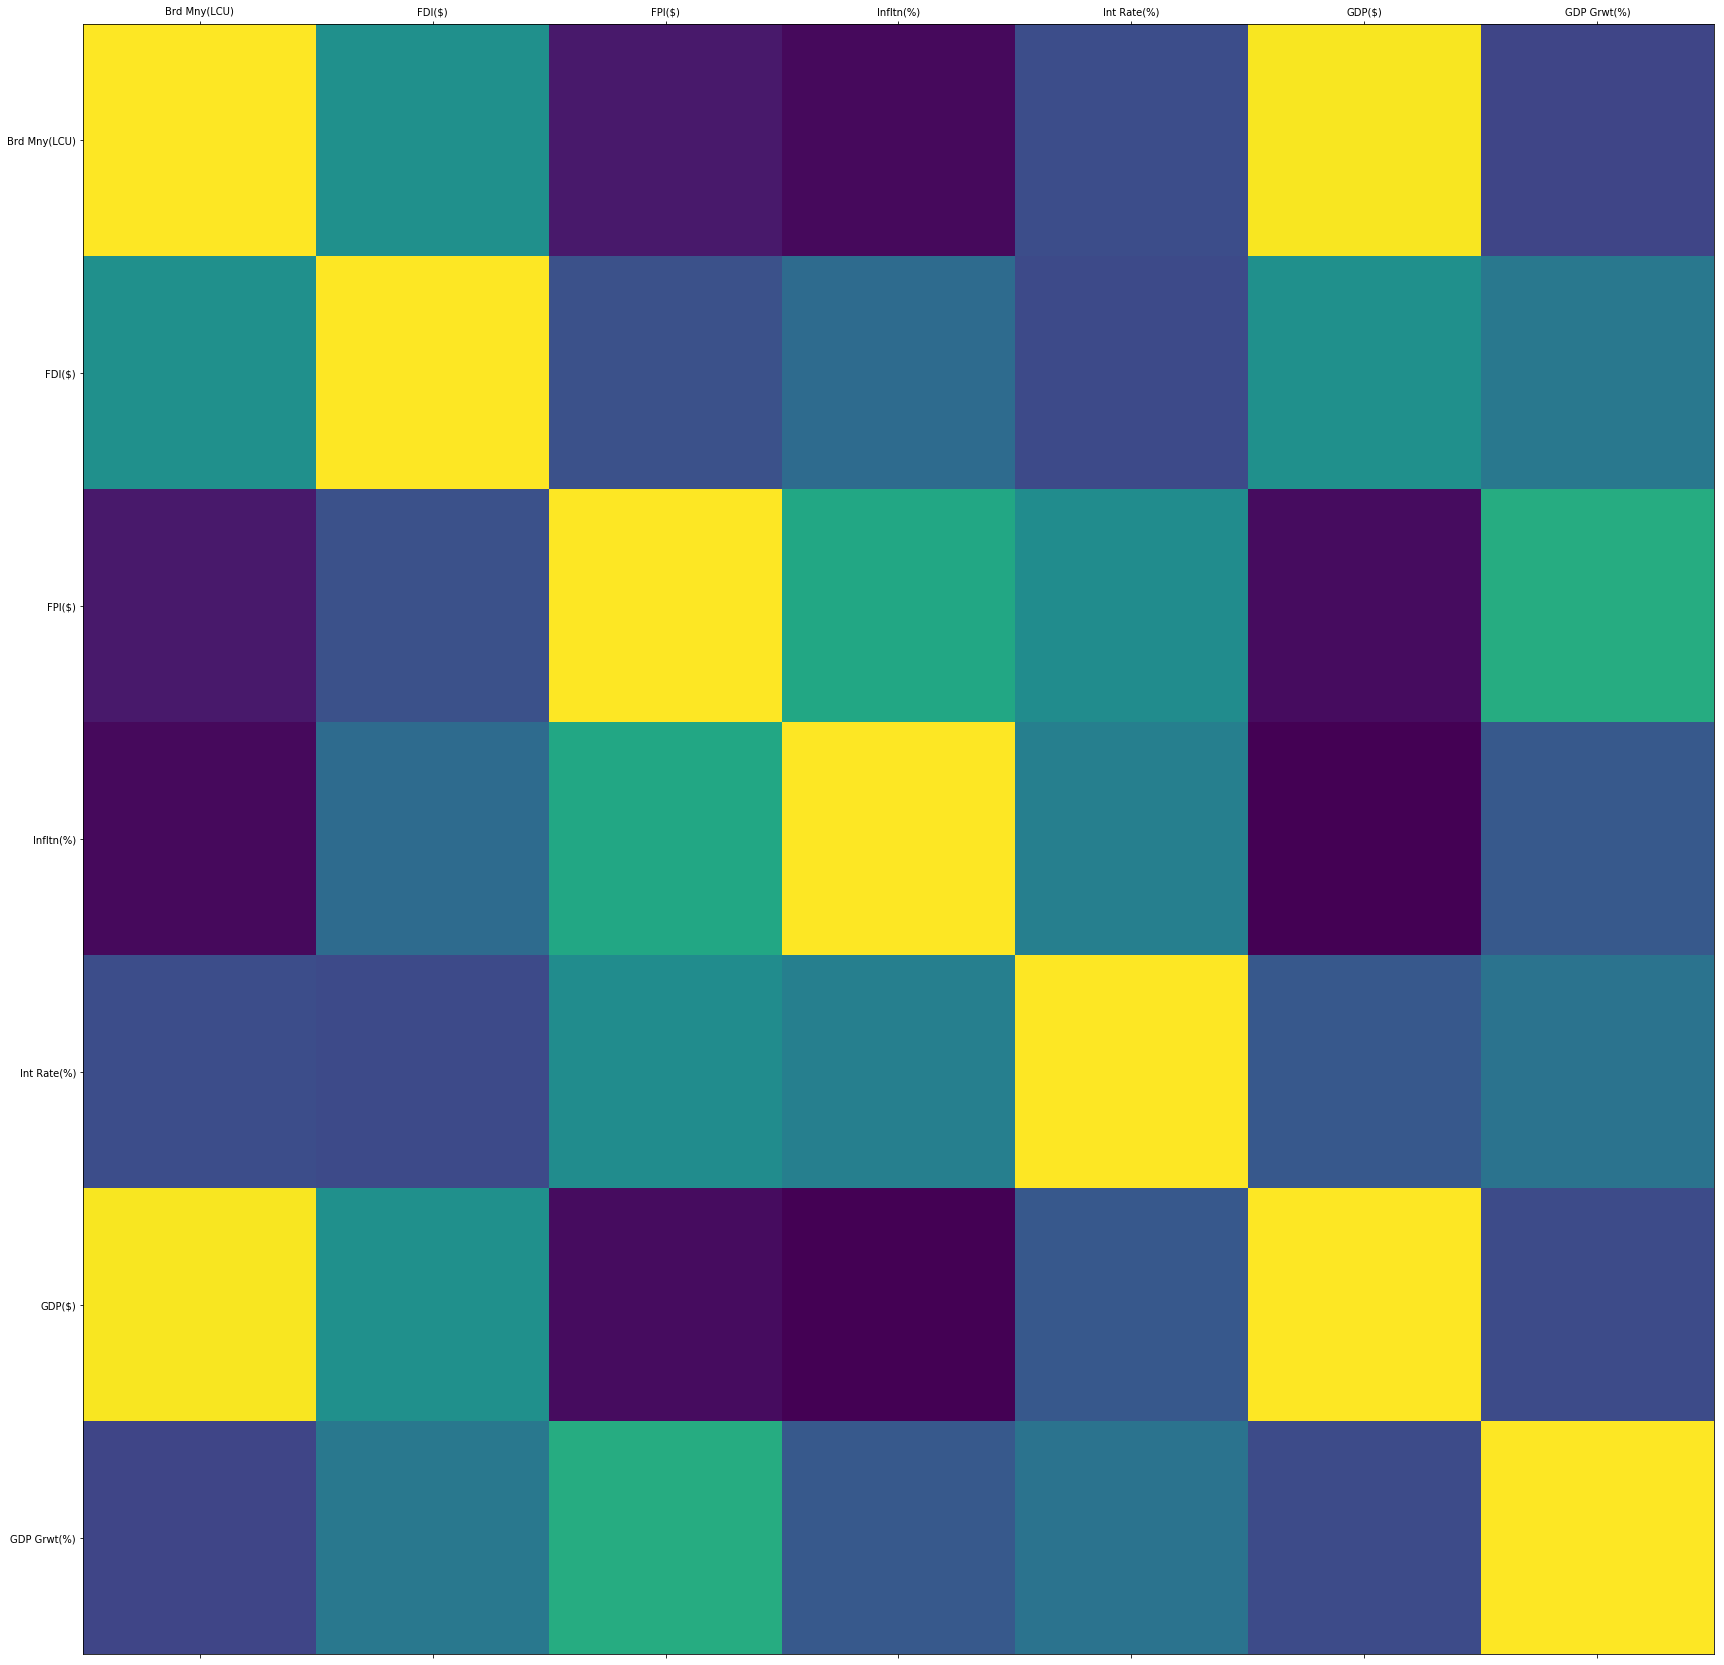

In [20]:
plot_corr(all_indicators_df)

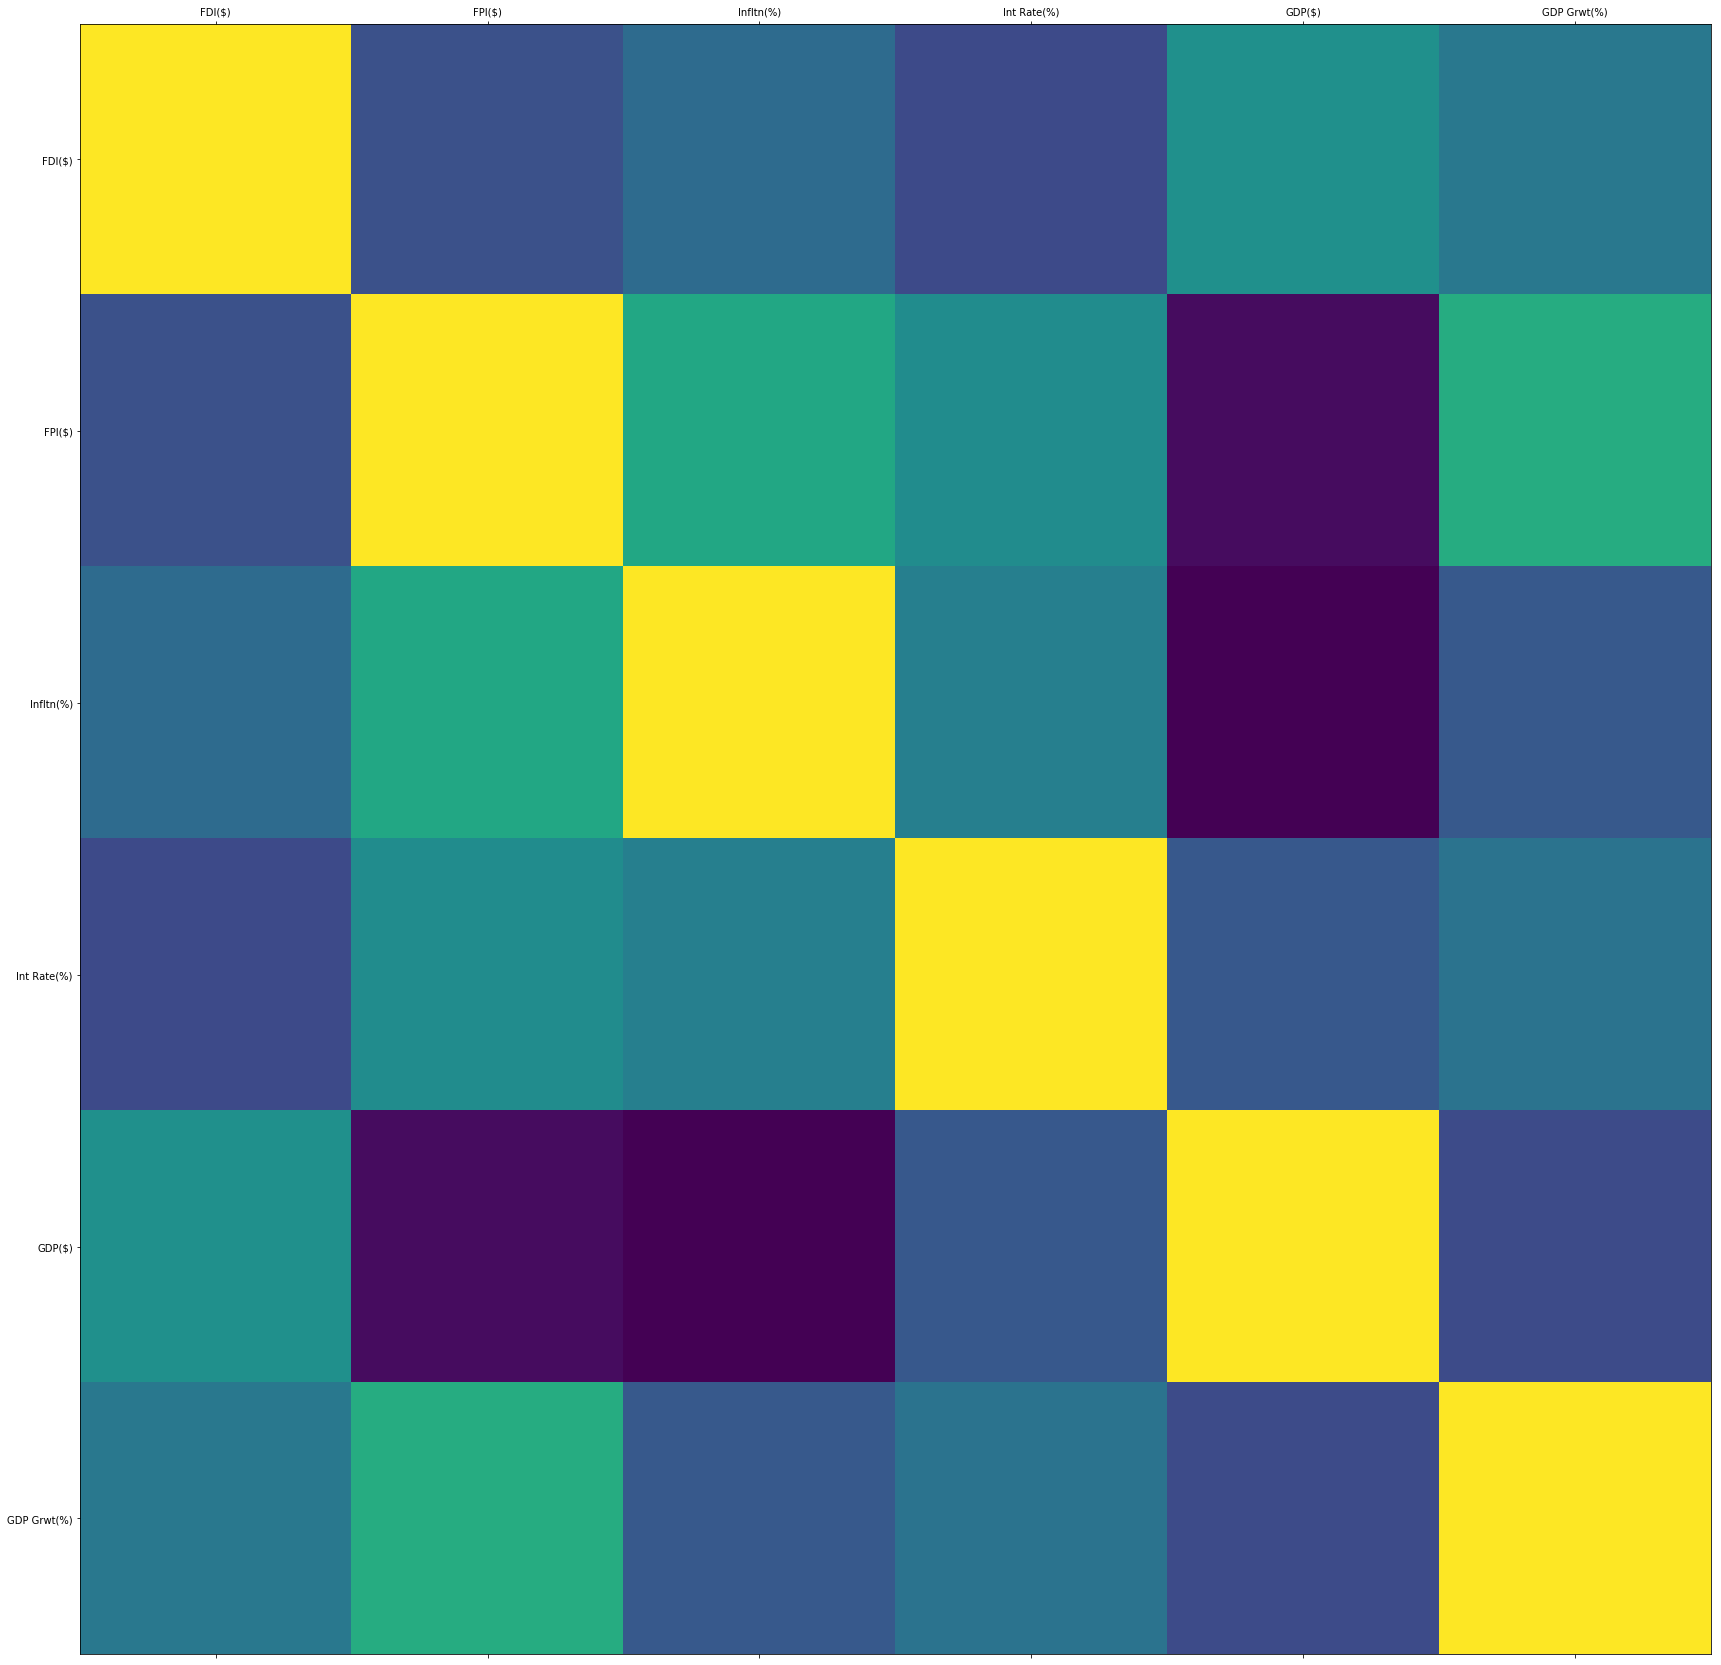

In [21]:
try:
    del all_indicators_df['Brd Mny(LCU)']
    #del all_indicators_df['GDP($)']
    #del all_indicators_df['Non-oil Rev(bn =N=)']
except KeyError:
    pass

plot_corr(all_indicators_df)

In [22]:
all_indicators_df.corr()

Indicators,FDI($),FPI($),Infltn(%),Int Rate(%),GDP($),GDP Grwt(%)
Indicators,,,,,,
FDI($),1.000000,-0.258198,-0.086340,-0.295048,0.167114,0.000255
FPI($),-0.258198,1.000000,0.332185,0.137893,-0.614297,0.362483
Infltn(%),-0.086340,0.332185,1.000000,0.047960,-0.672402,-0.205315
Int Rate(%),-0.295048,0.137893,0.047960,1.000000,-0.209321,-0.034132
GDP($),0.167114,-0.614297,-0.672402,-0.209321,1.000000,-0.290065
GDP Grwt(%),0.000255,0.362483,-0.205315,-0.034132,-0.290065,1.000000


###### -

## Checking & Fixing Zero Values

In [45]:
try:
    print("# rows in dataframe {0}".format(len(all_indicators_df)))
    print("# rows missing Gov Rev(bn =N=): {0}".format(len(all_indicators_df['Gov Rev(bn =N=)'] == 0)))
    print("# rows missing FDI($): {0}".format(len(all_indicators_df['FDI($)'] == 0)))
    print("# rows missing FPI($): {0}".format(len(all_indicators_df['FPI($)'] == 0)))
    print("# rows missing Infltn(%): {0}".format(len(all_indicators_df['Infltn(%)'] == 0)))
    print("# rows missing Int Rate(%): {0}".format(len(all_indicators_df['Int Rate(%)'] == 0)))
    print("# rows missing GDP Grwt(%): {0}".format(len(all_indicators_df['GDP Grwt(%)'] == 0)))
    
except KeyError:
    pass

# rows in dataframe 47


In [24]:
try:
    all_indicators_df.head(6)
    
except ValueError:
    pass

###### -

## Splitting The Data

In [25]:
# 70% for training, 30% for testing

In [26]:
from sklearn.model_selection import train_test_split

#feature_col_names = ['Gov Rev(bn =N=)','FDI($)','FPI($)','Infltn(%)','Int Rate(%)']
#predicted_class_names = ['GDP Grwt(%)']

X = all_indicators_df.drop('GDP Grwt(%)', axis=1)
Y = all_indicators_df['GDP Grwt(%)']

# X = all_indicators_df[feature_col_names].values    # predictor feature column
# Y = all_indicators_df[predicted_class_names].values    # predicted class
split_test_size = 0.30

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

type(X_train)

pandas.core.frame.DataFrame

In [27]:
# Checking the percentages of our split data

print("{0:0.2f}% in training set".format((len(X_train)/len(all_indicators_df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(all_indicators_df.index)) * 100))

68.09% in training set
31.91% in test set


###### -

## Training Initial Algorithm

### Using Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Mearsure the R^2 of the model. The measure of how good the model is
# Value is between 0 and 1. The close to 1 the R^2 value, the better the model.

linear_model.score(X_train, Y_train) # Measures the R^2 of our model on our training data

0.5952494723662015

In [30]:
# View the coefficent assigned to features to see which one has more effect
# on the predicted label

linear_model.coef_

array([ 2.65430104e-12,  3.09050113e-12, -4.73455827e-01, -2.74191017e-01,
       -2.61740775e-13])

In [31]:
# View coefficients for each particular feature.

predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

Indicators
Infltn(%)     -4.734558e-01
Int Rate(%)   -2.741910e-01
GDP($)        -2.617408e-13
FDI($)         2.654301e-12
FPI($)         3.090501e-12
dtype: float64


In [32]:
# Make predictions on test data

y_predict = linear_model.predict(x_test)

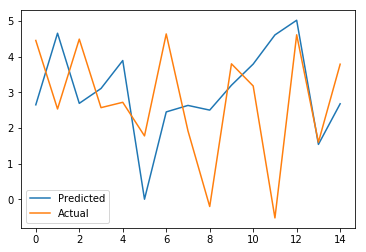

In [33]:
# Comparing the predicted and actual values of GDP Growth Rate
#pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
#plt.ylabel('Price')

#plt.figure(figsize=(20,9))

plt.legend()
plt.show()

#### R-square score
For our model, how well do the features describe the gdp growth?

In [34]:
r_square = linear_model.score(x_test, y_test)
r_square

-0.5055994766463578

#### Calculate Mean Square Error

In [35]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

3.778993378231041

#### Root of Mean Square Error

In [36]:
import math

math.sqrt(linear_model_mse)

1.9439633171001558

### Lasso Regression  
  
Cost Function: RSS + <b>&alpha;</b>*(sum of absolute values of coefficients)

RSS = Residual Sum of Squares

Larger values of <b>&alpha;</b> should result in smaller coefficients as the cost function needs to be minimized

In [37]:
from sklearn.linear_model import Lasso
    
lasso_model = Lasso(alpha=0.01, normalize=False)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Check R-square on training data

In [38]:
# Mearsure the R^2 of the model. The measure of how good the model is
# Value is between 0 and 1. The close to 1 the R^2 value, the better the model.

lasso_model.score(X_train, Y_train)

0.5952415153125998

#### Coefficients when using Lasso

In [39]:
# View coefficients for each particular feature.

predictors = X_train.columns
coef = pd.Series(lasso_model.coef_,predictors).sort_values()

print(coef)

Indicators
Infltn(%)     -4.715924e-01
Int Rate(%)   -2.722798e-01
GDP($)        -2.608462e-13
FDI($)         2.665353e-12
FPI($)         3.093883e-12
dtype: float64


#### Make predictions on test data

In [40]:
y_predict = lasso_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


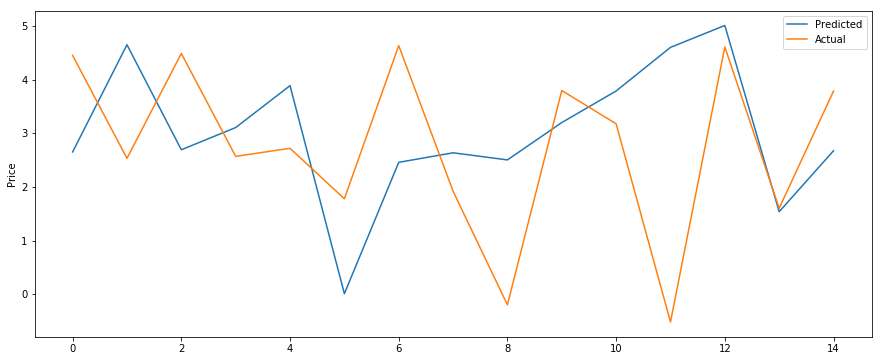

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Check R-square value on test data

In [42]:
r_square = lasso_model.score(x_test, y_test)
r_square

-0.502725877117032

#### Is the root mean square error any better?

In [43]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

1.9421072988961432